### fbProphet Tutorial QuickStart
* https://facebook.github.io/prophet/docs/quick_start.html

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('./input/example_wp_peyton_manning.csv')
df['y'] = np.log(df['y'])
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [3]:
print("min time:", df.ds.min())
print("max time:", df.ds.max())

min time: 2007-12-10
max time: 2016-01-20


In [4]:
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/takizawa/dev/python/play/prophet/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [5]:
future = m.make_future_dataframe(periods=365)

In [6]:
future.head()

,ds
0,2007-12-10
1,2007-12-11
2,2007-12-12
3,2007-12-13
4,2007-12-14


In [7]:
print("min time:", future.ds.min())
print("max time:", future.ds.max())

min time: 2007-12-10 00:00:00
max time: 2017-01-19 00:00:00


* 元のデータに1年分の日付が加えられている。

In [8]:
forecast = m.predict(future)

In [9]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2007-12-10,8.044384,8.044384,8.044384,8.209349,9.494287,0.802842,0.802842,0.802842,0.802842,0.802842,0.802842,0.352313,0.352313,0.352313,0.450529,0.450529,0.450529,8.847226
1,2007-12-11,8.042831,8.042831,8.042831,8.021172,9.180243,0.552870,0.552870,0.552870,0.552870,0.552870,0.552870,0.119648,0.119648,0.119648,0.433223,0.433223,0.433223,8.595701
2,2007-12-12,8.041278,8.041278,8.041278,7.798963,9.072034,0.350178,0.350178,0.350178,0.350178,0.350178,0.350178,-0.066673,-0.066673,-0.066673,0.416851,0.416851,0.416851,8.391457
3,2007-12-13,8.039726,8.039726,8.039726,7.695819,8.997121,0.329616,0.329616,0.329616,0.329616,0.329616,0.329616,-0.072244,-0.072244,-0.072244,0.401860,0.401860,0.401860,8.369342
4,2007-12-14,8.038173,8.038173,8.038173,7.738125,8.947560,0.319068,0.319068,0.319068,0.319068,0.319068,0.319068,-0.069588,-0.069588,-0.069588,0.388656,0.388656,0.388656,8.357241


In [10]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.209074,7.502878,8.942655
3266,2017-01-16,8.534139,7.815112,9.259735
3267,2017-01-17,8.321541,7.603424,9.011744
3268,2017-01-18,8.154138,7.463586,8.955939
3269,2017-01-19,8.166091,7.413187,8.885232


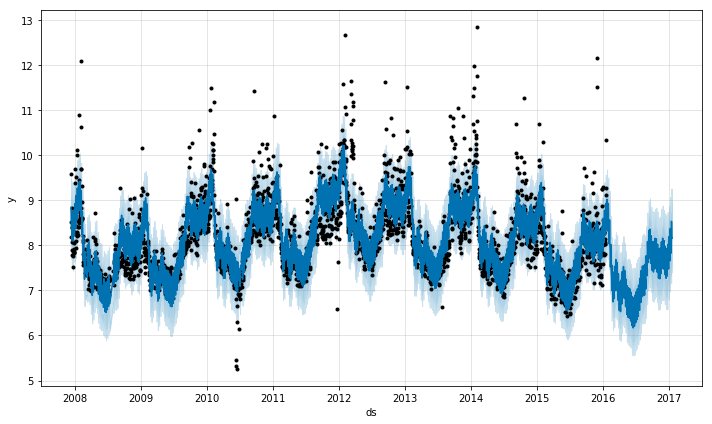

In [11]:
m.plot(forecast);

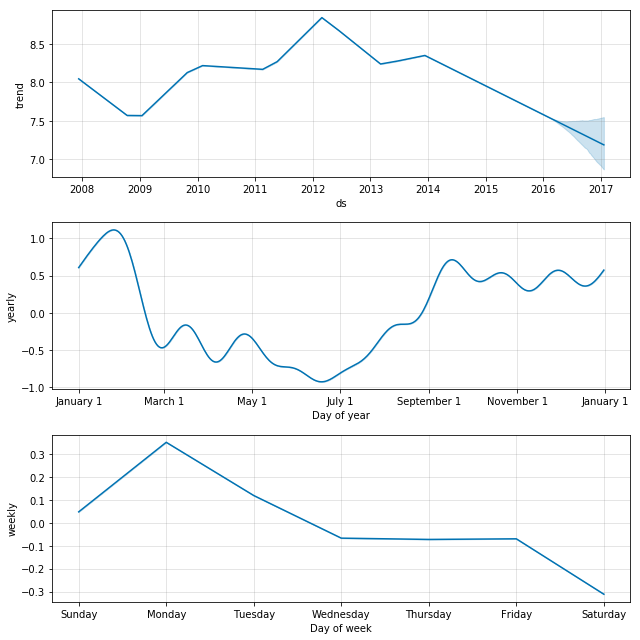

In [12]:
m.plot_components(forecast);